In [5]:
%matplotlib inline
import sys
sys.path.append("/home/diego/Dropbox/hold_noise/iclamp-glm/")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Starting gradient ascent... 

 Iteration 24 of 100 | Elapsed time: 0.06 seconds | log_prior=nan | log_posterior=-313.53
 
 Iteration 24 of 100 | Converged | Elapsed time: 0.001 minutes | Log posterior is monotonic 



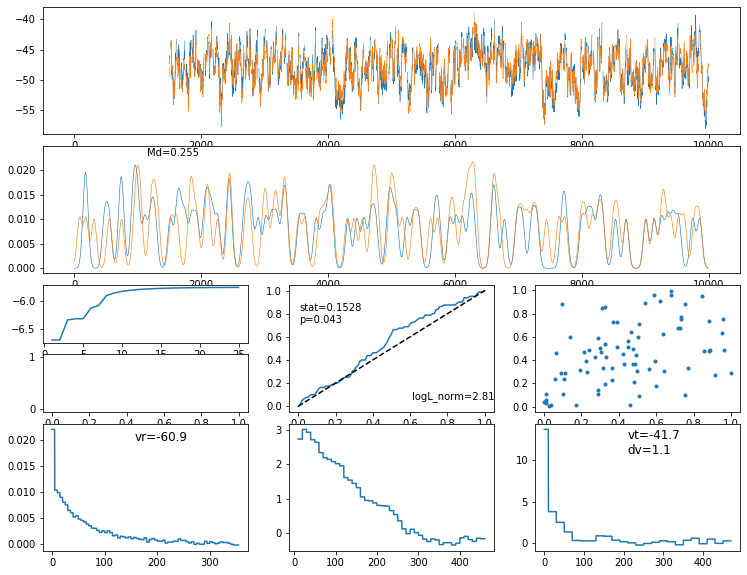

In [7]:
import numpy as np
# from icglm.glm_fitting import GLMFitter
from icglm.iclamp import IClamp
from icglm.kernels import KernelFun, KernelRect
from icglm.models.lssrm import LSSRM
from icglm.plot.fit import SRMPlotter
from icglm.spiketrain import SpikeTrain

ic = IClamp.load_from_abf(path='./18o03049.abf')
ic = ic.sweeps(np.array([0]))
# t0, tf = 0, 12000.2
t0, tf = 1000.1, 11000.1
ic = ic.subtract_Ih(th=1000.1).restrict(t0=t0, tf=tf, reset_time=True)
ic = ic.set_mask_spikes(thr=-13, t_before_spike_peak=0.8).subsample(1)
mask_subthreshold = ic.get_mask_away_from_spikes(5, 10, t0=1500)
# fig, (ax1, ax2) = ic.plot(spikes=True)

# TODO. IMPLEMENTAR
#ic.mask(mask_subtreshold).plot()
# ax1.plot(ic.t[mask_subthreshold[:, 0]], ic.v[mask_subthreshold])/

kappa = KernelRect(tbins=np.arange(0, 360, 5))
eta = KernelRect(tbins=np.arange(10, 470, 10))
tbins_gamma = np.append([0], np.arange(10, 480, 20))
coefs_gamma0 = 5 * np.exp(-tbins_gamma[:-1] / 50)
gamma = KernelRect(tbins=tbins_gamma, coefs=coefs_gamma0)

newton_kwargs = dict(max_iterations=100, stop_cond=5e-4, learning_rate=1e-1, initial_learning_rate=1e-2, warm_up_iterations=2)

srm = LSSRM(vr=-65, kappa=kappa.copy(), eta=eta.copy(), vt=-35, dv=1, gamma=gamma.copy())
optimizer, logl = srm.fit(ic.t, ic.stim, ic.mask_spikes, ic.v, mask_subthreshold, newton_kwargs=newton_kwargs, verbose=True)
z, ks_stats = srm.time_rescale_transform(ic.t, ic.stim, ic.mask_spikes)
v_model, r = srm.simulate_subthreshold(ic.t, ic.stim, ic.mask_spikes)
_, _, mask_spikes_model = srm.sample(ic.t, ic.stim)

kernel1, kernel2 = KernelRect.kistler_kernels(4, 1)
psth_kernel = KernelFun.gaussian_delta(delta=40)
st_exp = SpikeTrain(ic.t, ic.mask_spikes)
st_model = SpikeTrain(ic.t, mask_spikes_model)
psth_exp = st_exp.get_psth(psth_kernel)
psth_model = st_model.get_psth(psth_kernel)
Md = st_exp.Md(st_model, kernel1, kernel2)

srmp = SRMPlotter(ic=ic, srm=srm, mask_subthreshold=mask_subthreshold, optimizer=optimizer, log_likelihood_normed=logl, z=z, ks_stats=ks_stats, 
                  psth_exp=psth_exp, psth_model=psth_model, Md=Md, v_exp=ic.data, v_model=v_model)

fig, axs = srmp.plot_summary()

Starting gradient ascent... 

 Iteration 24 of 100 | Elapsed time: 0.1 seconds | log_prior=nan | log_posterior=-304.79
 
 Iteration 24 of 100 | Converged | Elapsed time: 0.0017 minutes | Log posterior is monotonic 

Starting gradient ascent... 

 Iteration 24 of 100 | Elapsed time: 0.1 seconds | log_prior=nan | log_posterior=-304.79
 
 Iteration 24 of 100 | Converged | Elapsed time: 0.0016 minutes | Log posterior is monotonic 

Starting gradient ascent... 

 Iteration 23 of 100 | Elapsed time: 0.09 seconds | log_prior=nan | log_posterior=-379.62
 
 Iteration 23 of 100 | Converged | Elapsed time: 0.0016 minutes | Log posterior is monotonic 

Starting gradient ascent... 

 Iteration 24 of 100 | Elapsed time: 0.06 seconds | log_prior=nan | log_posterior=-314.6
 
 Iteration 24 of 100 | Converged | Elapsed time: 0.0009 minutes | Log posterior is monotonic 



(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe489a0c048>,
       dtype=object))

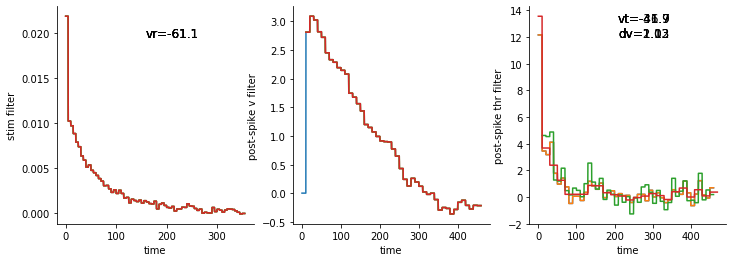

In [74]:
import numpy as np
# from icglm.glm_fitting import GLMFitter
from icglm.iclamp import IClamp
from icglm.kernels import KernelRect
from icglm.models.lssrm import LSSRM
from icglm.plot.fit import SRMPlotter

ic = IClamp.load_from_abf(path='./18o03049.abf')
ic = ic.sweeps(np.array([0]))
# t0, tf = 0, 12000.2
t0, tf = 1000.1, 11000.1
ic = ic.subtract_Ih(th=1000.1).restrict(t0=t0, tf=tf, reset_time=True)
ic = ic.set_mask_spikes(thr=-13, t_before_spike_peak=0.8).subsample(1)
mask_subthreshold = ic.get_mask_away_from_spikes(5, 10, t0=1000, tf=11000.1)
# fig, (ax1, ax2) = ic.plot(spikes=True)

# TODO. IMPLEMENTAR
#ic.mask(mask_subtreshold).plot()
# ax1.plot(ic.t[mask_subthreshold[:, 0]], ic.v[mask_subthreshold])/

kappa = KernelRect(tbins=np.arange(0, 360, 5))
eta = KernelRect(tbins=np.arange(0, 470, 10))
tbins_gamma = np.arange(0, 470, 10)
coefs_gamma0 = 5 * np.exp(-tbins_gamma[:-1] / 50)
gamma = KernelRect(tbins=tbins_gamma, coefs=coefs_gamma0)

newton_kwargs = dict(max_iterations=100, stop_cond=5e-4, learning_rate=1e-1, initial_learning_rate=1e-2, warm_up_iterations=2)

srm = LSSRM(vr=-65, kappa=kappa.copy(), eta=eta.copy(), vt=-35, dv=1, gamma=gamma.copy())
# srm.fit_subthreshold_voltage(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, stim_h=0)
srm.fit(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, newton_kwargs=newton_kwargs, verbose=True)

srm2 = LSSRM(vr=-65, kappa=kappa.copy(), eta=KernelRect(tbins=np.arange(10, 470, 10)), vt=-35, dv=1, gamma=gamma.copy())
# srm2.fit_subthreshold_voltage(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, stim_h=0)
srm2.fit(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, newton_kwargs=newton_kwargs, verbose=True)

tbins_gamma = np.arange(10, 470, 10)
coefs_gamma0 = 5 * np.exp(-tbins_gamma[:-1] / 50)
srm3 = LSSRM(vr=-65, kappa=kappa.copy(), eta=KernelRect(tbins=np.arange(10, 470, 10)), vt=-35, dv=1, gamma=KernelRect(tbins=tbins_gamma, coefs=coefs_gamma0))
srm3.fit(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, newton_kwargs=newton_kwargs, verbose=True)

tbins_gamma = np.concatenate(([0], np.arange(10, 480, 20)))
coefs_gamma0 = 5 * np.exp(-tbins_gamma[:-1] / 50)
srm4 = LSSRM(vr=-65, kappa=kappa.copy(), eta=KernelRect(tbins=np.arange(10, 470, 10)), vt=-35, dv=1, gamma=KernelRect(tbins=tbins_gamma, coefs=coefs_gamma0))
srm4.fit(ic.t, ic.stim, ic.v, ic.mask_spikes, mask_subthreshold, newton_kwargs=newton_kwargs, verbose=True)

fig, axs = SRMPlotter(srm=srm).plot_filters()
SRMPlotter(srm=srm2).plot_filters(axs=axs)
SRMPlotter(srm=srm3).plot_filters(axs=axs)
SRMPlotter(srm=srm4).plot_filters(axs=axs)

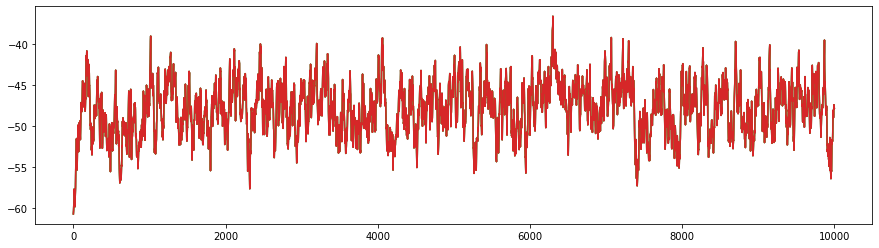

In [75]:
v, r = srm.simulate_subthreshold(ic.t, ic.stim, ic.mask_spikes)
v2, r2 = srm2.simulate_subthreshold(ic.t, ic.stim, ic.mask_spikes)
v3, r3 = srm3.simulate_subthreshold(ic.t, ic.stim, ic.mask_spikes)
v4, r4 = srm4.simulate_subthreshold(ic.t, ic.stim, ic.mask_spikes)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.plot(ic.t, v)
plt.plot(ic.t, v2)
plt.plot(ic.t, v3)
plt.plot(ic.t, v4)

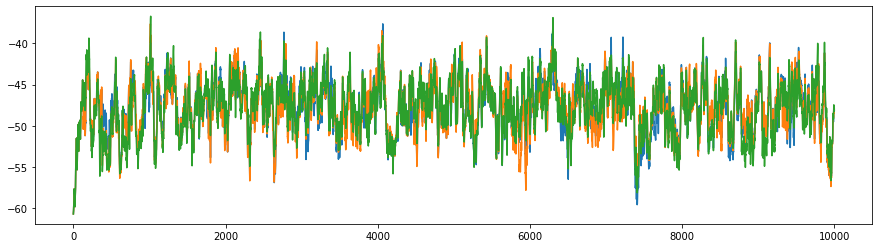

In [77]:
v, r, mask = srm.sample(ic.t, ic.stim)
v2, r2, m = srm2.sample(ic.t, ic.stim)
v3, r3, m = srm3.sample(ic.t, ic.stim)
v4, r4, m = srm4.sample(ic.t, ic.stim)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.plot(ic.t, v)
plt.plot(ic.t, v2)
# plt.plot(ic.t, v3)
plt.plot(ic.t, v4)

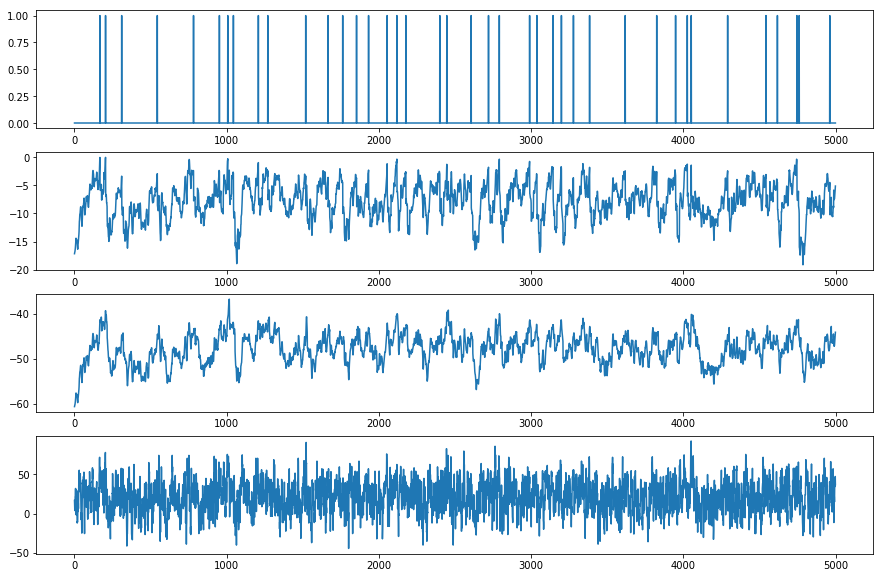

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15, 10), nrows=4)
ax1.plot(t, mask_spk)
ax2.plot(t, psi_conv - gamma_conv - srm.u0)
ax3.plot(t, v)
ax4.plot(t, st)

In [72]:
import numpy as np
# from icglm.glm_fitting import GLMFitter
from icglm.iclamp import IClamp
from icglm.kernels import KernelFun, KernelRect
from icglm.srm import SRM
from icglm.fitting import Fitter

filename, neuron = '18o03049', '181003_4'

tbins_gamma = np.arange(0, 225, 25)
srm = SRM(kappa=KernelRect(tbins=np.arange(0, 360, 5)), eta=KernelRect(tbins=np.arange(10, 470, 10)), 
          psi=KernelRect(tbins=np.array([0, 1])), gamma=KernelRect(tbins=tbins_gamma))

theta0 = np.concatenate(([-20], [0.95], np.exp(-tbins_gamma[:-1] / 20) * 5))
newton_kwargs = dict(learning_rate=5e-1, initial_learning_rate=1e-2, max_iterations=200, stop_cond=5e-4, 
                     lr_scale=0.2, warm_up_iterations=2)

kernel1, kernel2 = KernelRect.kistler_kernels(4, 1)
psth_kernel = KernelFun.gaussian_delta(40)

fitter = Fitter(model=srm, neuron=neuron, filename=filename)
fitter.load_iclamp_file('./18o03049.abf')
# fitter = fitter.sweeps(np.array([0]))
t0, tf = 1000.1, 11000.1
fitter = fitter.subtract_Ih(th=1000.1).restrict(t0=t0, tf=tf, reset_time=True)
fitter = fitter.set_mask_spikes(thr=-13, t_before_spike_peak=0.8).subsample(1, average_stim=True)
fitter = fitter.set_mask_subthreshold(3, 10, t0=1000, tf=11000.1)
fitter = fitter.fit(theta0=theta0, newton_kwargs=newton_kwargs, verbose=True)
fitter.time_rescale_transform()
fitter.set_mask_spikes_model(trials=3)
fitter.psth(psth_kernel=psth_kernel, biased=True)
fitter.set_Md(kernel1, kernel2, biased=True)

Starting gradient ascent... 

 Iteration 0 of 200 | Elapsed time: 0.0 seconds
 
 Iteration 22 of 200 | Converged | Elapsed time: 0.0079 minutes | Log posterior is monotonic 

1 (10000, 3)


0.5086994986729578

AttributeError: 'Fitter' object has no attribute 'glm'

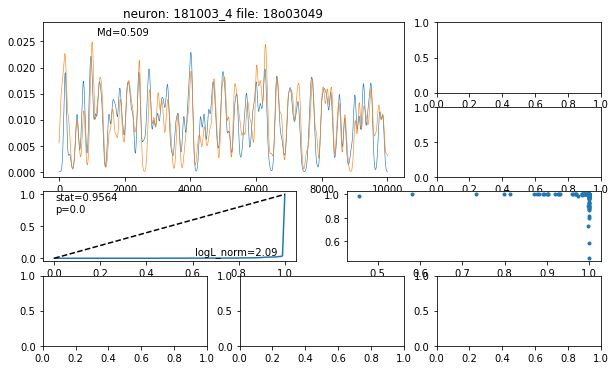

In [73]:
fitter.plot_fit()

(<Figure size 864x360 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f9387d832b0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9387dbc9e8>))

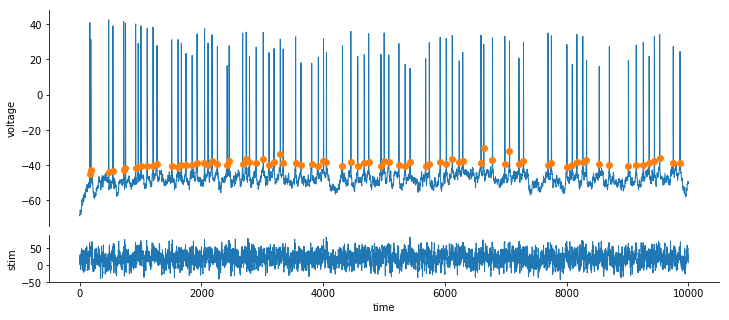

In [24]:
fitter.ic.plot(spikes=True)

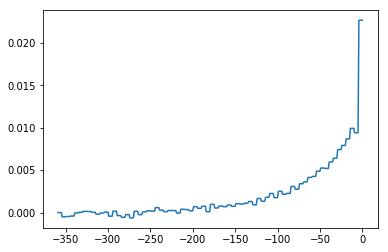

In [12]:
t = np.arange(0, 360, 1)
y = srm.kappa.interpolate(t)
fig, ax = plt.subplots()
ax.plot(-t, y)

In [7]:
plt.figure()
plt.plot(glm.log_posterior_iterations)

NameError: name 'glm' is not defined

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

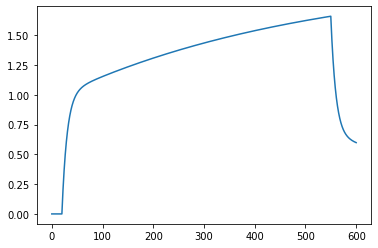

In [4]:
import matplotlib.pyplot as plt
from icglm.kernels import KernelFun
tau1, tau2 = 10, 500
ker1 = KernelFun.exponential(tau1, 1 / tau1)
ker2 = KernelFun.exponential(tau2, 1 / tau2)
t = np.arange(0, 600, .1)
I = np.zeros(len(t))
I[200:5500] = 1

a = 1
signal = a * ker1.convolve_continuous(t, I) + ker2.convolve_continuous(t, I)
# signal = a * ker1.convolve_continuous(t, I) * ker2.convolve_continuous(t, I)

plt.figure()
plt.plot(t, signal)

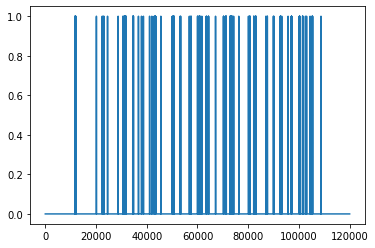

In [27]:
vt0, dV = -39, .85
r = np.exp((v_simu - vt0) / dV)
p = 1 - np.exp(-r)
mask_spk = np.random.rand(len(ic.t))[:, None] < p
plt.figure()
plt.plot(mask_spk)

In [13]:
from icglm.signals import searchsorted

In [18]:
searchsorted(np.arange(0, 1000, .1), 0)

0